Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


Import dataset into df

In [4]:
df = pd.read_csv('/Projects/US-Visa-Approval-Prediction/notebook/EasyVisa.csv')
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


View dataset properties

In [5]:
df.shape

(25480, 12)

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Exploring dataset

In [17]:
# Define numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features = numeric_features.columns.tolist()
print("Numeric Features:", numeric_features)

categorical_features = (df.select_dtypes(include=[object])).columns.tolist()
print("Categorical features:",categorical_features)


Numeric Features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [20]:
# Proportion of unique values in each categorical feature
for col in categorical_features:
    print(f"Unique values proportion for {col}:")
    print(df[col].value_counts(normalize=True)* 100)
    print("\n")

Unique values proportion for case_id:
case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64


Unique values proportion for continent:
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64


Unique values proportion for education_of_employee:
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64


Unique values proportion for has_job_experience:
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64


Unique values proportion for requires_job_training:
requires_job_training

Insights:
* continent - this is highly biased with asia having 66% data.
* requires_job_training - this can be considered as biased with 88% marked as YES, but can be ignored as this might not be important in prediction.
* unit_of_wage - this is also biased with 90% data marked as yearly contracts.

Univariate Analysis

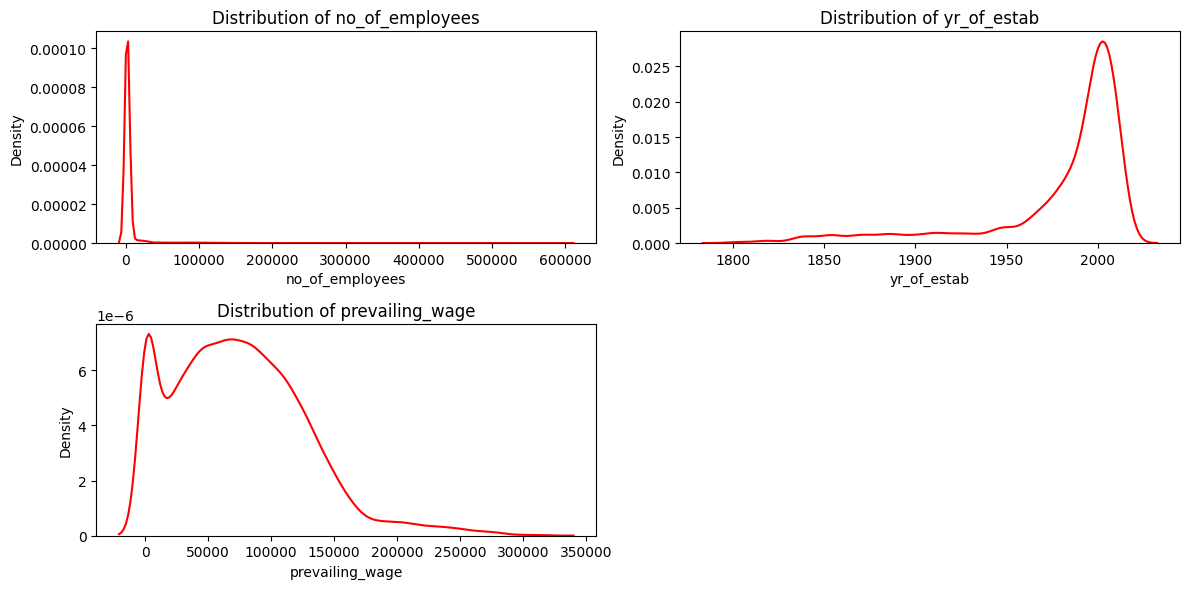

In [31]:
# Numerical features analysis - checking distributions

plt.figure(figsize=(12, 6))

for i in range(0, len(numeric_features)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(df[numeric_features[i]], color='red')
    plt.title(f'Distribution of {numeric_features[i]}')
    plt.tight_layout()
    plt.xlabel(numeric_features[i])

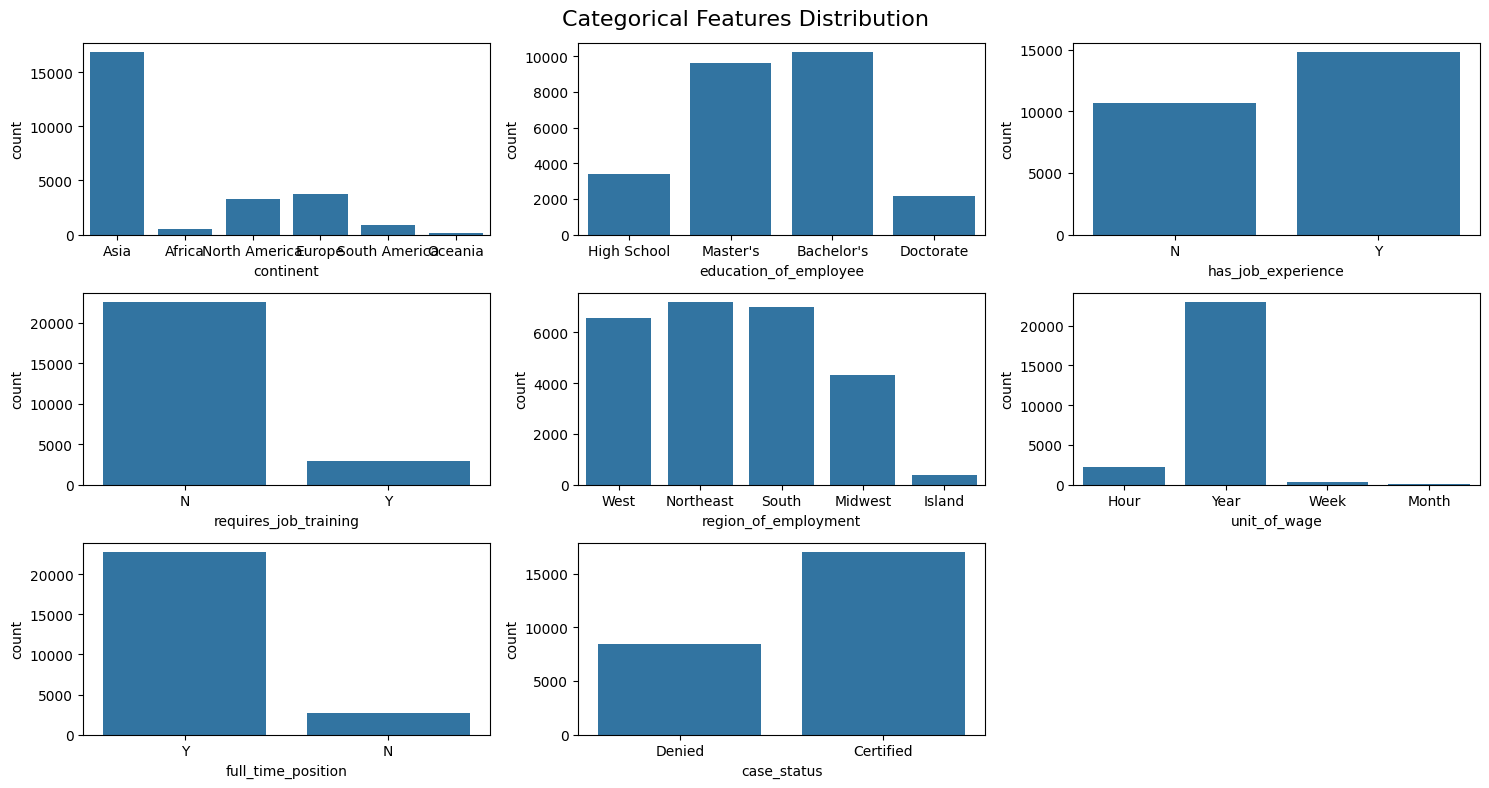

In [30]:
# Categorical features analysis - checking distributions
# categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Categorical Features Distribution', fontsize=16)
for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    # plt.title(f'Distribution of {categorical_features[i]}')
    plt.tight_layout()


Multivariate analysis - distribution of numerical features by case status

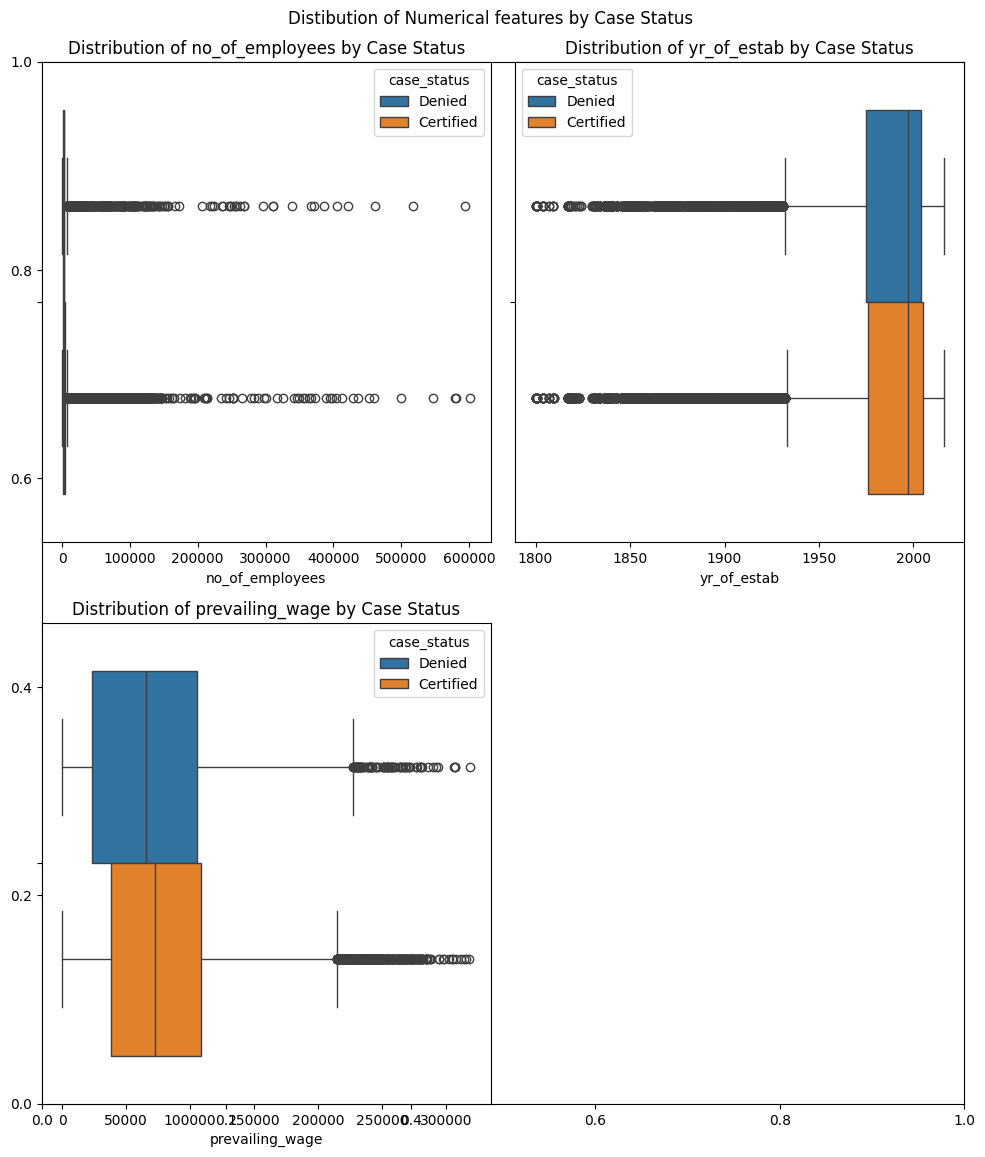

In [33]:
fig, ax = plt.subplots(figsize=(10, 12))
fig.suptitle('Distibution of Numerical features by Case Status')
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=numeric_features[i], hue='case_status', fill=True)
    plt.title(f'Distribution of {numeric_features[i]} by Case Status')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Visualize the target feature

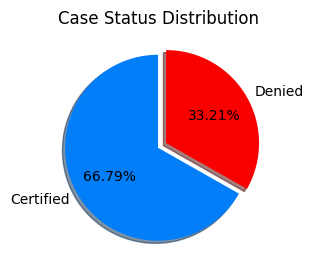

In [42]:
percentage = df['case_status'].value_counts(normalize=True)* 100
labels = ["Certified", "Denied"]

plt.figure(figsize=(3, 4))
explode = (0, 0.1)
plt.pie(percentage, labels=labels, autopct='%1.2f%%', startangle=90, colors=["#027ef9","#f90101"], explode=explode, shadow=True)
plt.title('Case Status Distribution')
plt.show()

Checking impact of any column on the target column

In [46]:
# group by continent and count case status
df.groupby('continent')['case_status'].value_counts(normalize=True)*100


continent      case_status
Africa         Certified      72.050817
               Denied         27.949183
Asia           Certified      65.310480
               Denied         34.689520
Europe         Certified      79.233655
               Denied         20.766345
North America  Certified      61.877278
               Denied         38.122722
Oceania        Certified      63.541667
               Denied         36.458333
South America  Certified      57.863850
               Denied         42.136150
Name: proportion, dtype: float64

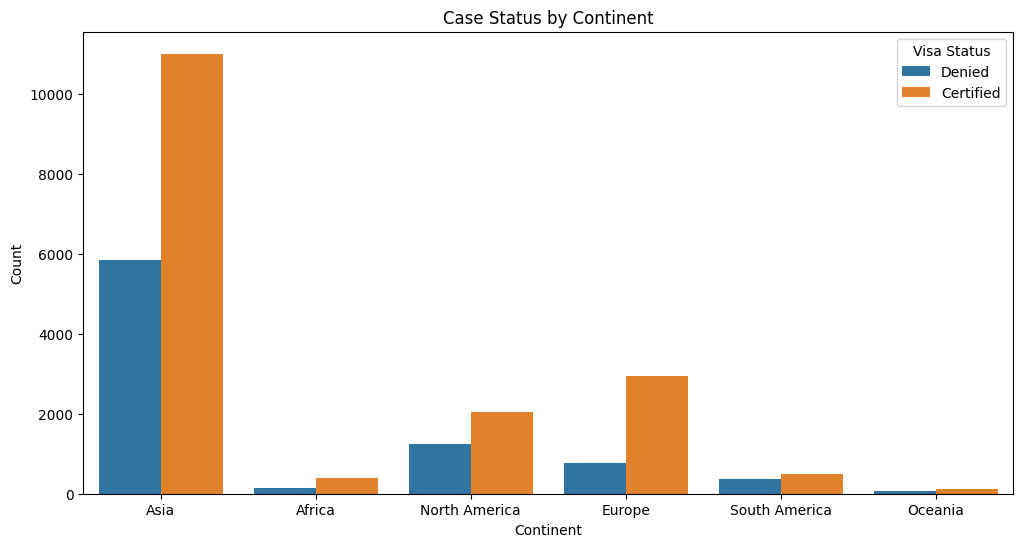

In [56]:
plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='continent', hue='case_status')
plt.title('Case Status by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend(title='Visa Status', labels=['Denied', 'Certified'])
plt.show()

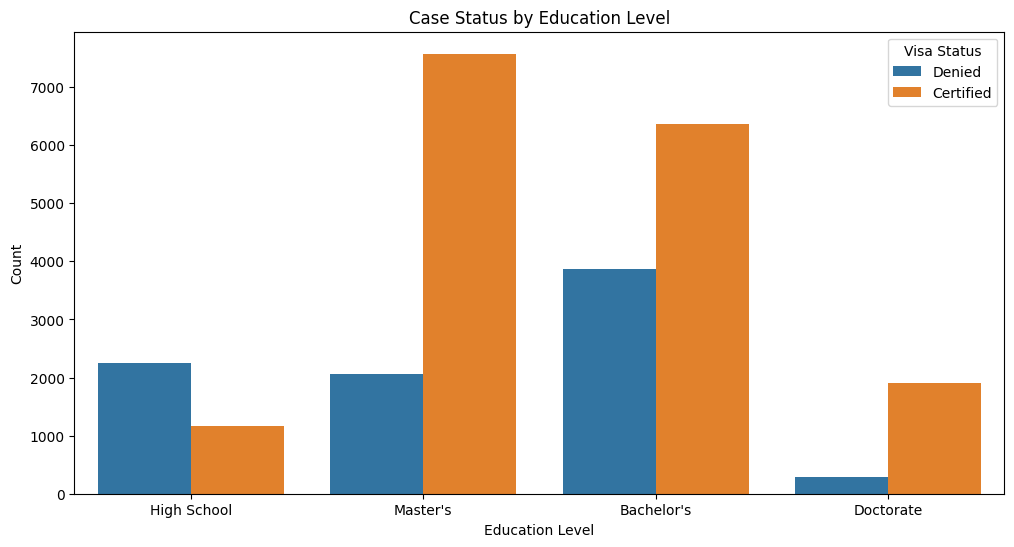

In [57]:
# checking case status by education
plt.subplots(figsize=(12, 6))
plt.title('Case Status by Education Level')
sns.countplot(data=df, x='education_of_employee', hue='case_status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Visa Status', labels=['Denied', 'Certified'])
plt.show()

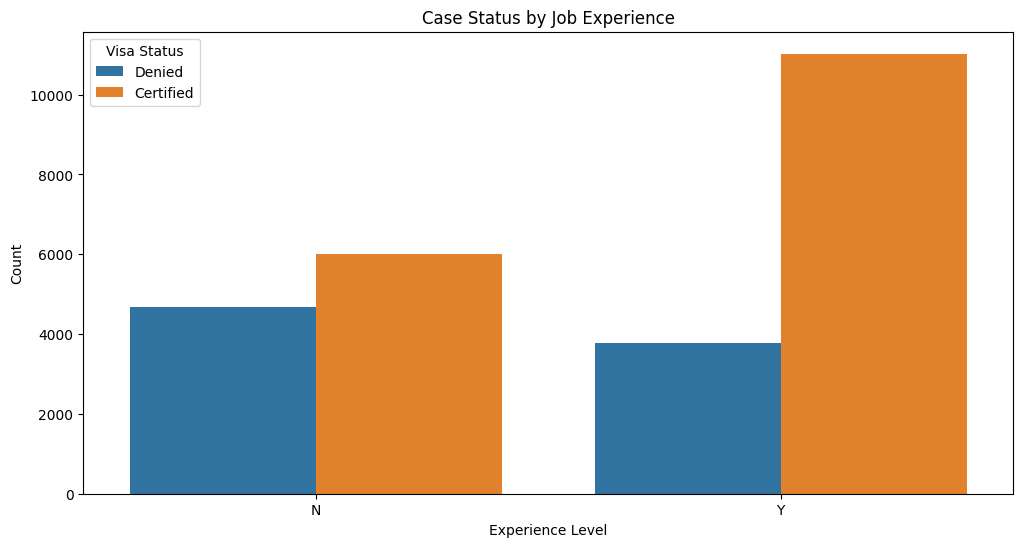

In [58]:
# checking case status by experience
plt.subplots(figsize=(12, 6))
plt.title('Case Status by Job Experience')
sns.countplot(data=df, x='has_job_experience', hue='case_status')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Visa Status', labels=['Denied', 'Certified'])
plt.show()

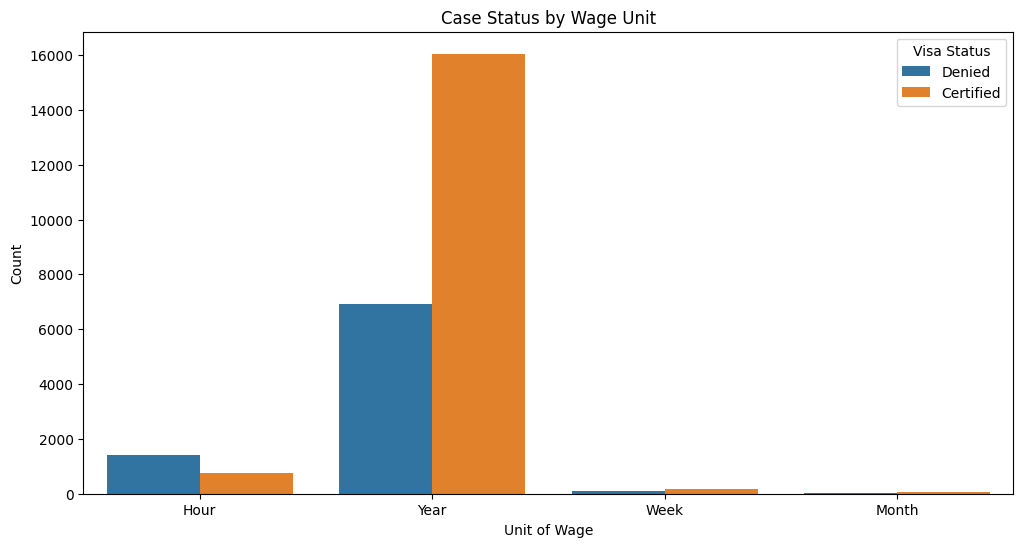

In [59]:
# checking case status by wage
plt.subplots(figsize=(12, 6))
plt.title('Case Status by Wage Unit')
sns.countplot(data=df, x='unit_of_wage', hue='case_status')
plt.xlabel('Unit of Wage')
plt.ylabel('Count')
plt.legend(title='Visa Status', labels=['Denied', 'Certified'])
plt.show()

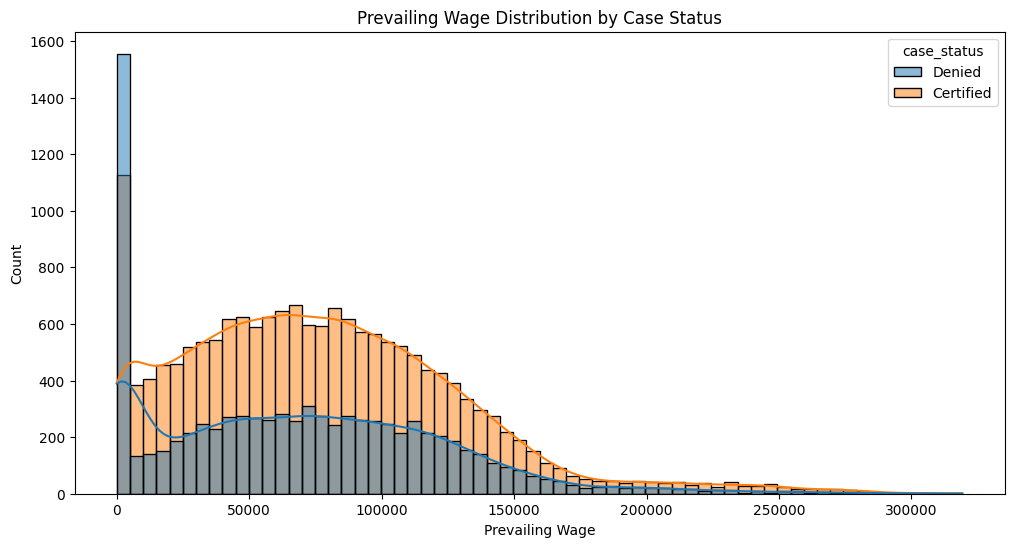

In [61]:
# prevailing wage by case status

plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x='prevailing_wage', hue='case_status', kde=True)
plt.title('Prevailing Wage Distribution by Case Status')
plt.xlabel('Prevailing Wage')
plt.ylabel('Count')
plt.show()